**Loading the dataset that we scrapped**

In [ ]:
import pandas as pd
file_path = 'merge_csv.csv'
data = pd.read_csv(file_path)

**Printing first five rows of fake news with label 0**

In [ ]:

print(data.head())


               news_name  label
0              Fake Name      0
1       Israel-Hamas war      0
2  Bears outlast Vikings      0
3              Elon Musk      0
4            Frank Reich      0


**Printing last five rows of authentic news with label 1**

In [ ]:
last_five_rows = data.tail(5)
print(last_five_rows)

                                              news_name  label
1398  Rifts in Europe over irregular migration remai...      1
1399  Hezbollah says it is introducing new weapons i...      1
1400            Guest lineups for the Sunday news shows      1
1401  New clues in FBI’s secretive dig for Civil War...      1
1402  Military-ruled Myanmar hosts joint naval exerc...      1


**renaming labels i-e: 0 with false and 1 with true**

In [ ]:
data.columns = ['News', 'Label']
data['Label'] = data['Label'].replace({0: False, 1: True})

**shuffling the news with labels**

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
print(data.head())
print(data.tail())

                                                News  Label
0  Iowa woman who made fake cancer claims on soci...  False
1  Top Connecticut state police leaders retiring ...  False
2  EU beefs up disinformation code to prevent dig...  False
3  Israel says inscription in Persian pottery sha...   True
4  New Mexico Lobos and the Toledo Rockets square...   True
                                                   News  Label
1398  Another Met Gala in the books, so how did they...   True
1399  Newspaper group publisher G. Ogden Nutting has...   True
1400  Columbia Journalism Review editor leaving to e...   True
1401  FACT FOCUS: Fake image of Pentagon explosion b...  False
1402  New Jersey blaze leaves 8 firefighters injured...   True


**Text cleaning**

In [ ]:
data['News'] = data['News'].str.replace('[^\w\s]','')
# converting news string into lower
data['News'] = data['News'].str.lower()
# removing special characters
data['News'] = data['News'].str.replace('[^A-Za-z0-9 ]+','')
# splitiing my text for the tokenization
data['News'] = data['News'].str.split()
print(data.head())


                                                News  Label
0  [iowa, woman, who, made, fake, cancer, claims,...  False
1  [top, connecticut, state, police, leaders, ret...  False
2  [eu, beefs, up, disinformation, code, to, prev...  False
3  [israel, says, inscription, in, persian, potte...   True
4  [new, mexico, lobos, and, the, toledo, rockets...   True


**Text Preprocessing**

In [ ]:
import pandas as pd
import string
# Removing duplicate news
data.drop_duplicates(subset='News', keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)
# Displaying preprocessed data
print(data.head())


                                                News  Label
0  [iowa, woman, who, made, fake, cancer, claims,...  False
1  [top, connecticut, state, police, leaders, ret...  False
2  [eu, beefs, up, disinformation, code, to, prev...  False
3  [israel, says, inscription, in, persian, potte...   True
4  [new, mexico, lobos, and, the, toledo, rockets...   True


# **Feature Extraction USING BOW**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tokenized_text = data['News'].apply(lambda x: ' '.join(x))
#BOW vector:
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(tokenized_text)
#converting into dataframe
bow_df = pd.DataFrame(bow_vectors.toarray(), columns=bow_vectorizer.get_feature_names_out())

print(bow_df.head())

   000  07  09  10  100  104  106  108  10k  11  ...  yourself  youth  \
0    0   0   0   0    0    0    0    0    0   0  ...         0      0   
1    0   0   0   0    0    0    0    0    0   0  ...         0      0   
2    0   0   0   0    0    0    0    0    0   0  ...         0      0   
3    0   0   0   0    0    0    0    0    0   0  ...         0      0   
4    0   0   0   0    0    0    0    0    0   0  ...         0      0   

   youtube  yusef  zach  zatko  zealand  zeroed  zeroing  zimbabwe  
0        0      0     0      0        0       0        0         0  
1        0      0     0      0        0       0        0         0  
2        0      0     0      0        0       0        0         0  
3        0      0     0      0        0       0        0         0  
4        0      0     0      0        0       0        0         0  

[5 rows x 3889 columns]


# **Machine Learning Models:**

**LOGISTIC REGRESSION Using BOW**

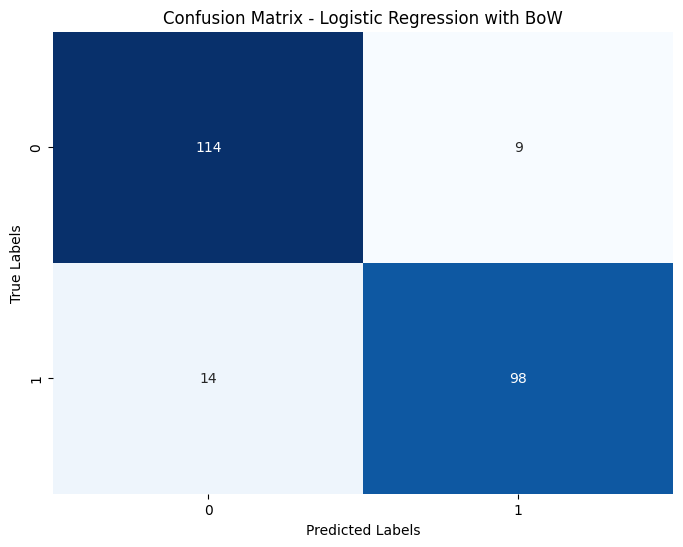

Logistic Regression Model Accuracy with BoW: 0.902127659574468


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#CORPUS:
corpus = data['News'].apply(lambda x: ' '.join(x))
labels = data['Label']

# Creating
count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(corpus)

X_train, X_test, y_train, y_test = train_test_split(X_bow, labels, test_size=0.2, random_state=42)
logistic_model_bow = LogisticRegression()
logistic_model_bow.fit(X_train, y_train)

# Predictions
predictions_bow = logistic_model_bow.predict(X_test)

# confusion matrix
conf_matrix_bow = confusion_matrix(y_test, predictions_bow)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression with BoW')
plt.show()
accuracy_bow = accuracy_score(y_test, predictions_bow)
print(f"Logistic Regression Model Accuracy with BoW: {accuracy_bow}")


# **Logistic Regression using TF-IDF**

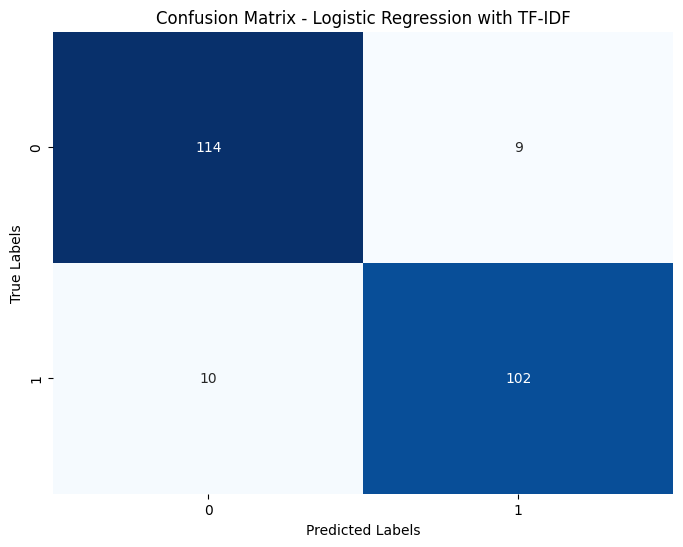

Logistic Regression Model Accuracy with TF-IDF: 0.9191489361702128


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
corpus = data['News'].apply(lambda x: ' '.join(x))
labels = data['Label']

# Creating TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

#fitting Logistic Regression model
logistic_model_tfidf = LogisticRegression()
logistic_model_tfidf.fit(X_train, y_train)
#PREDICTION
predictions_tfidf = logistic_model_tfidf.predict(X_test)
# Calculate the confusion matrix
conf_matrix_tfidf = confusion_matrix(y_test, predictions_tfidf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression with TF-IDF')
plt.show()

# PRINT:
accuracy_tfidf = accuracy_score(y_test, predictions_tfidf)
print(f"Logistic Regression Model Accuracy with TF-IDF: {accuracy_tfidf}")


# **Naive Bayes using TF-IDF**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = data['News'].apply(lambda x: ' '.join(x))
labels = data['Label']

# Creating TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Evaluating the model
accuracy = naive_bayes_model.score(X_test, y_test)
print("Naive Bayes Model Accuracy Using tf-idf:", accuracy)


Naive Bayes Model Accuracy Using tf-idf: 0.8723404255319149


# **Naive Bayes using BOW**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

corpus = data['News'].apply(lambda x: ' '.join(x))
labels = data['Label']
count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(corpus)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, labels, test_size=0.2, random_state=42)

# fitting Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Evaluating the model
accuracy = naive_bayes_model.score(X_test, y_test)
print("Naive Bayes Model Accuracy Using BOW:", accuracy)


Naive Bayes Model Accuracy Using BOW: 0.9063829787234042


# **Deep learning Models**

# **Deep Learning using CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

corpus = data['News'].apply(lambda x: ' '.join(x))
labels = data['Label']

# Tokenizing text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index
max_sequence_length = max([len(seq) for seq in sequences])

# Padding sequences to ensure uniform length
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# Splitting
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels, test_size=0.2, random_state=42)

# CNN model architecture
embedding_dim = 100
vocab_size = len(word_index) + 1

cnn_model = Sequential()
cnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Training cnn
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
15/15 [==============================] - 2s 40ms/step - loss: 0.6603 - accuracy: 0.6347 - val_loss: 0.6265 - val_accuracy: 0.7021
Epoch 2/10
15/15 [==============================] - 0s 24ms/step - loss: 0.4536 - accuracy: 0.8147 - val_loss: 0.3900 - val_accuracy: 0.8340
Epoch 3/10
15/15 [==============================] - 0s 26ms/step - loss: 0.1703 - accuracy: 0.9425 - val_loss: 0.2681 - val_accuracy: 0.8766
Epoch 4/10
15/15 [==============================] - 0s 22ms/step - loss: 0.0499 - accuracy: 0.9883 - val_loss: 0.2555 - val_accuracy: 0.9021
Epoch 5/10
15/15 [==============================] - 0s 24ms/step - loss: 0.0150 - accuracy: 0.9947 - val_loss: 0.2832 - val_accuracy: 0.9064
Epoch 6/10
15/15 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 0.9989 - val_loss: 0.2975 - val_accuracy: 0.8979
Epoch 7/10
15/15 [==============================] - 0s 25ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.3104 - val_accuracy: 0.9021
Epoch 8/10
15

# **Deep Learning using RNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
corpus = data['News'].apply(lambda x: ' '.join(x))
labels = data['Label']

# Tokenizing text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index
max_sequence_length = max([len(seq) for seq in sequences])

# Padding sequences to ensure uniform length
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels, test_size=0.2, random_state=42)

# RNN model architecture
vocab_size = len(word_index) + 1
embedding_dim = 100

rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
rnn_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer with dropout
rnn_model.add(Dense(1, activation='sigmoid'))


rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the RNN model
rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
15/15 [==============================] - 6s 109ms/step - loss: 0.6767 - accuracy: 0.6667 - val_loss: 0.6309 - val_accuracy: 0.6213
Epoch 2/10
15/15 [==============================] - 1s 80ms/step - loss: 0.4796 - accuracy: 0.8019 - val_loss: 0.5532 - val_accuracy: 0.6723
Epoch 3/10
15/15 [==============================] - 1s 78ms/step - loss: 0.2876 - accuracy: 0.8967 - val_loss: 0.3211 - val_accuracy: 0.8979
Epoch 4/10
15/15 [==============================] - 1s 77ms/step - loss: 0.1387 - accuracy: 0.9595 - val_loss: 0.2990 - val_accuracy: 0.8766
Epoch 5/10
15/15 [==============================] - 1s 79ms/step - loss: 0.0839 - accuracy: 0.9659 - val_loss: 0.2768 - val_accuracy: 0.8638
Epoch 6/10
15/15 [==============================] - 1s 78ms/step - loss: 0.0495 - accuracy: 0.9883 - val_loss: 0.2725 - val_accuracy: 0.8979
Epoch 7/10
15/15 [==============================] - 1s 79ms/step - loss: 0.0349 - accuracy: 0.9883 - val_loss: 0.3267 - val_accuracy: 0.8766
Epoch 8/10
1

# **EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Predictions on test data
predictions = cnn_model.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32')
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


8/8 [==============================] - 0s 4ms/step
Accuracy: 0.902127659574468
Precision: 0.8869565217391304
Recall: 0.9107142857142857
F1-Score: 0.8986784140969162
Confusion Matrix:
[[110  13]
 [ 10 102]]


# **Visualization**

In [ ]:
import plotly.graph_objs as go

# Define metric names and values
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]

# Create a bar chart
fig = go.Figure(data=[go.Bar(x=metrics_names, y=metrics_values)])
fig.update_layout(title='Model Performance Metrics', xaxis_title='Metrics', yaxis_title='Values')
fig.show()


In [ ]:
import plotly.figure_factory as ff

# Creating a heatmap for the confusion matrix
fig = ff.create_annotated_heatmap(conf_matrix, x=['Predicted Negative', 'Predicted Positive'], y=['Actual Negative', 'Actual Positive'])
fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted', yaxis_title='Actual')
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


model_names = ['logistic regression', 'Naive bayes']
accuracies = [0.89, 0.92]


colors = ['blue', 'orange']

fig = make_subplots(rows=1, cols=1, subplot_titles=['Accuracy Comparison'], specs=[[{'type': 'bar'}]])

trace = go.Bar(
    x=model_names,
    y=accuracies,
    marker=dict(color=colors),
    text=[f'Accuracy: {at*100:.2f}%' for at in accuracies],
    textposition='outside'
)

fig.add_trace(trace)

fig.update_layout(
    xaxis=dict(title=' Maching Laerning Models'),
    yaxis=dict(title='Accuracy'),
    showlegend=False
)

fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


Atest_accuracy = 0.78
Ftest_accuracy = 0.6964


colors = ['blue', 'red']

fig = make_subplots(rows=1, cols=1, subplot_titles=['Accuracy Comparison'], specs=[[{'type': 'bar'}]])

trace = go.Bar(
    x=['CNN', 'RNN'],
    y=[Atest_accuracy, Ftest_accuracy],
    marker=dict(color=colors),
    text=[f'Accuracy: {at*100:.2f}%' for at in [Atest_accuracy, Ftest_accuracy]],
    textposition='outside'
)

fig.add_trace(trace)

fig.update_layout(
    xaxis=dict(title='Deep Learning Models'),
    yaxis=dict(title='Accuracy'),
    showlegend=False
)

fig.show()
